## Desciption

1. Data Cleaning: Commenced with a dataset containing job listings and undertook a series of data cleaning tasks to prepare the dataset for analysis. This included handling missing values, standardizing column names, and cleaning data in various columns.

2. Exploratory Data Analysis (EDA): Conducted exploratory data analysis to gain insights from the dataset. This involved analyzing various aspects such as job titles, salary information, company ratings, company sizes, founding years, ownership types, sectors, and industries.

3. Salary Analysis: Salary analysis was carried out by performing tasks like cleaning salary columns, handling values below 10,000, and visualizing salary distributions using histograms.

4. Job Location Analysis: The analysis of job locations involved data cleaning and visualizing job opportunities by location on a bar chart.

5. Company Size Analysis: Company size analysis resulted in the creation of a bar chart to visualize job opportunities by company size.

6. Company Founded Year Analysis: The analysis of the distribution of companies by founding year explored the impact of a company's age on salaries and ratings.

7. Type of Ownership Analysis: The analysis of the distribution of company ownership types examined whether these ownership types affect salaries and ratings.

8. Industry and Sector Analysis: The analysis of the distribution of job opportunities by industry and sector led to the creation of bar charts for data visualization.

9. Revenue Analysis: The analysis of the distribution of companies based on revenue ranges explored whether revenue affects salaries or other variables.

10. Job Description Keyword Analysis: A keyword analysis was performed on job descriptions to identify common keywords. This helped in understanding the skills and requirements in high demand.

### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.ticker import FuncFormatter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

### Load dataset

In [2]:
df = pd.read_csv("/kaggle/input/glassdoor-data-science-job-listings/glassdoor_jobs.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD)
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD)
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD)
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD)
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1500 non-null   object 
 1   Salary Estimate    1500 non-null   object 
 2   Job Description    1500 non-null   object 
 3   Rating             1500 non-null   float64
 4   Company Name       1500 non-null   object 
 5   Location           1500 non-null   object 
 6   Size               1500 non-null   object 
 7   Founded            1500 non-null   int64  
 8   Type of ownership  1500 non-null   object 
 9   Industry           1500 non-null   object 
 10  Sector             1500 non-null   object 
 11  Revenue            1500 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 140.8+ KB


### Cleaning Data

In [4]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(len(duplicates))

680


In [5]:
# Remove duplicates and save them in a new DataFrame
df_cleaned = df.drop_duplicates()

# Check the new DataFrame
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 0 to 1350
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          820 non-null    object 
 1   Salary Estimate    820 non-null    object 
 2   Job Description    820 non-null    object 
 3   Rating             820 non-null    float64
 4   Company Name       820 non-null    object 
 5   Location           820 non-null    object 
 6   Size               820 non-null    object 
 7   Founded            820 non-null    int64  
 8   Type of ownership  820 non-null    object 
 9   Industry           820 non-null    object 
 10  Sector             820 non-null    object 
 11  Revenue            820 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 83.3+ KB


In [6]:
# Check for missing data in each column
null_counts = df.isnull().sum()
print(null_counts)

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64


In [7]:
# Apply lowercase transformation to all values in the DataFrame
df_cleaned = df_cleaned.applymap(lambda x: x.lower() if isinstance(x, str) else x)

### 1. Job Title Analysis:

    - Identify the most common job titles.
    - Visualize the distribution of job titles using a bar chart.

In [8]:
# Calculate the number of unique job titles in the 'Job Title' column
unique_job_titles = df_cleaned['Job Title'].nunique()
print(f"Number of unique job titles: {unique_job_titles}")

Number of unique job titles: 370


In [9]:
# List of data-related terms
data_related_terms = ['data engineer','data software engineer', 'data instrument engineer','engineer, data', 'data analyst', 'data scientist', 'data science',
                      'date science', 'machine learning engineer', 'research scientist', 'machine learning', 'database','bioinformatics scientist',
                      'supply chain', 'research & development engineer', 'data mining scientist','data specialist','data analytics', 'scientist', 'data eng',
                      'computer engineering', 'business analyst', 'business inteligence', 'product manager', 'customer service', '-1', 'data consultant']

# Create a mapping of data-related terms to their general titles
data_related_mapping = {
    'data engineer': 'Data Engineer',
    'data software engineer': 'Data Engineer',
    'data instrument engineer': 'Data Engineer',
    'engineer, data': 'Data Engineer',
    'data analyst': 'Data Analyst',
    'data scientist': 'Data Scientist',
    'data science': 'Data Scientist',
    'date science': 'Data Scientist',
    'machine learning engineer': 'Machine Learning Engineer',
    'research scientist': 'Research Scientist',
    'machine learning': 'Machine Learning Engineer',
    'database': 'Database Administrator',
    'bioinformatics scientist': 'Bioinformatics Scientist',
    'supply chain': 'Supply Chain Analyst',
    'research & development engineer': 'R&D Engineer',
    'data mining scientist': 'Data Mining Scientist',
    'data specialist': 'Data Specialist',
    'data analytics': 'Data Analyst',
    'scientist': 'Data Scientist',
    'data eng': 'Data Engineer',
    'computer engineering': 'Computer Engineer',
    'business analyst': 'Business Analyst',
    'business inteligence': 'Business Intelligence Analyst',
    'product manager': 'Product Manager',
    'customer service': 'Customer Service Representative',
    'data consultant': 'Data Consultant',
    '-1': 'Other'
}

In [10]:
# Function to extract job level and create a new "Title" column
def extract_job_level(job_title, job_description):
    # Define common level patterns using regular expressions
    level_patterns = {
        'Junior': r'\b(entry|entry level|junior|jr|1|I|graduate)\b',
        'Pleno': r'\b(pleno|mid|2|II)\b',
        'Senior': r'\b(senior|sr|3|III)\b',
        'Lead': r'\b(lead)\b',
        # 'manager': r'\b(manager)\b',
        # 'administrator': r'\b(administrator)\b',
        'Consultant': r'\b(consultor|consultanting|advisor)\b',
        'Vice President': r'\b(vice president)\b',
        # Add more patterns as needed
    }

    # Initialize level as "Other" by default
    level = 'Other'

    # Check level patterns in job titles
    for key, pattern in level_patterns.items():
        if re.search(pattern, job_title, re.I):
            level = key

    # If level is still "Other," check job description
    if level == 'Other':
        for key, pattern in level_patterns.items():
            if re.search(pattern, job_description, re.I):
                level = key

    return level

# Function to extract job title and create a new "Title" column
def extract_job_title(job_title):
    
    for term in data_related_terms:
        if term in job_title.lower():
            return term

    return 'Other'

# Apply the function to create the "Level" column
df_cleaned['Level'] = df_cleaned.apply(lambda x: extract_job_level(x['Job Title'], x['Job Description']), axis=1)

# Add a new "Title" column if "Data Scientist" is found
df_cleaned['job variations'] = df_cleaned['Job Title'].apply(lambda x: 'Data Scientist' if 'data scientist' in x.lower() else '')

# Apply the function to create the "Title" column for data-related terms
df_cleaned['job variations'] = df_cleaned.apply(lambda x: extract_job_title(x['Job Title']), axis=1)

# Reorder the columns
df_cleaned = df_cleaned[['Level', 'job variations', 'Job Title'] + [col for col in df_cleaned.columns if col not in ['Level', 'job variations', 'Job Title']]]

# Replace the original DataFrame with the modified DataFrame
df = df_cleaned

# Apply the mapping to create the "Title" column
df['Title'] = df['job variations'].map(data_related_mapping)

# Reorder the columns
df = df[['Level', 'Title', 'Job Title'] + [col for col in df.columns if col not in ['Level', 'Title', 'Job Title']]]


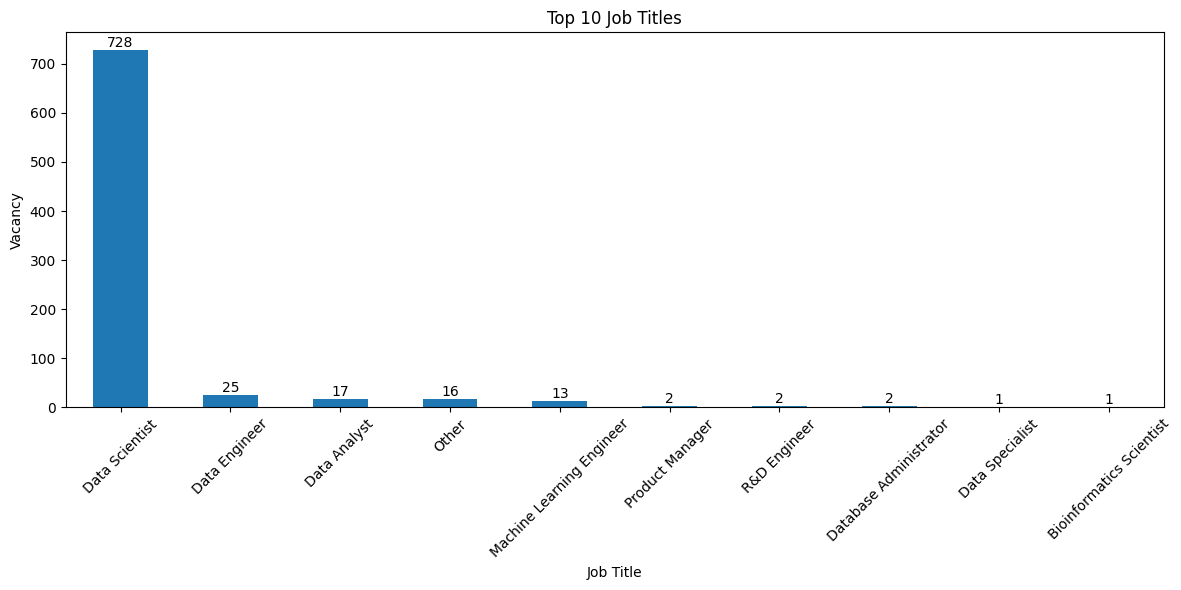

In [11]:
# Count job titles
job_title_counts = df_cleaned['Title'].value_counts()

# Select the most common job titles (e.g., top 10)
top_job_titles = job_title_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_job_titles.plot(kind='bar')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Vacancy')  # Update the label to 'Vagas' in Portuguese
plt.xticks(rotation=45)  # Rotate labels for better readability

# Add data labels on top of each bar
for i, count in enumerate(top_job_titles):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()

# Show the chart
plt.show()


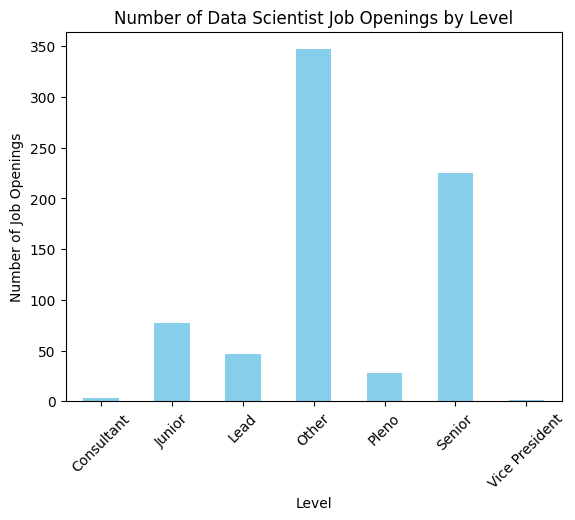

In [12]:
# Group the data by 'Level' and count the number of Data Scientist job openings in each level
data_scientist_by_level = df_cleaned[df_cleaned['Title'] == 'Data Scientist'].groupby('Level').size()

# Create a bar chart
data_scientist_by_level.plot(kind='bar', color='skyblue')
plt.xlabel('Level')
plt.ylabel('Number of Job Openings')
plt.title('Number of Data Scientist Job Openings by Level')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

### 2. Salary Analysis (Salary Estimate):

    - Calculate descriptive statistics for salaries, such as mean, median, and standard deviation.
    - Visualize the salary distribution using a histogram.
    - Analyze salaries in relation to other variables like location or sector.

In [13]:
# Extract numerical salary values from the 'Salary Estimate' column
df_cleaned['Salary Estimate']

0                                                      -1
1                   employer provided salary:$83k - $153k
2                   employer provided salary:$71k - $133k
3                   employer provided salary:$94k - $183k
4                            $48k - $78k (glassdoor est.)
                              ...                        
1146                                                   -1
1208                                                   -1
1281    employer provided salary:$70.00 - $73.00 per hour
1287                                                   -1
1350                employer provided salary:$82k - $143k
Name: Salary Estimate, Length: 820, dtype: object

In [14]:
# Function to extract salary values from text
def extract_salary(salary_text):
    match = re.search(r'\$(\d+[.]?\d*)k\s-\s\$(\d+[.]?\d*)k', salary_text)
    if match:
        min_salary = float(match.group(1)) *1000
        max_salary = float(match.group(2)) *1000
        return min_salary, max_salary
    return None, None

# Extract salary values from 'Salary Estimate' column
df_cleaned[['Min Salary', 'Max Salary']] = df_cleaned['Salary Estimate'].apply(extract_salary).apply(pd.Series)

# Function to calculate annual salaries for hourly rates
def calculate_annual_salary(salary_text):
    if 'per hour' in salary_text:
        match = re.search(r'\$(\d+[.]?\d*)\s*-\s*\$(\d+[.]?\d*)', salary_text)
        if match:
            min_hourly_salary = float(match.group(1))
            max_hourly_salary = float(match.group(2))
            annual_min_salary = min_hourly_salary * 40 * 52
            annual_max_salary = max_hourly_salary * 40 * 52
            return annual_min_salary, annual_max_salary
    return None, None

# Apply the function to calculate annual salaries for hourly rates in 'Salary Estimate' column
annual_salaries = df_cleaned['Salary Estimate'].apply(calculate_annual_salary).apply(pd.Series)

# Update 'Min Salary' and 'Max Salary' columns if the values are missing
df_cleaned['Min Salary'].fillna(annual_salaries[0], inplace=True)
df_cleaned['Max Salary'].fillna(annual_salaries[1], inplace=True)

#Replace "-1" with "N/A" in the "Min Salary" and "Max Salary" columns where applicable
df_cleaned['Min Salary'] = df_cleaned.apply(lambda x: 'N/A' if x['Salary Estimate'] == '-1' and pd.isna(x['Min Salary']) else x['Min Salary'], axis=1)
df_cleaned['Max Salary'] = df_cleaned.apply(lambda x: 'N/A' if x['Salary Estimate'] == '-1' and pd.isna(x['Max Salary']) else x['Max Salary'], axis=1)

# Reorder the columns as needed
df_cleaned = df_cleaned[['Level', 'Title', 'job variations', 'Job Title', 'Min Salary', 'Max Salary', 'Salary Estimate'] +
                                  [col for col in df_cleaned.columns if col not in ['Level', 'Title', 'job variations', 'Job Title',
                                                                                          'Min Salary', 'Max Salary', 'Salary Estimate']]]

# Print the cleaned DataFrame
df_cleaned.head()

,Level,Title,job variations,Job Title,Min Salary,Max Salary,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Other,Data Scientist,data scientist,data scientist,N/A,N/A,-1,job overview\na data scientist at explorelearn...,4.2,cambium learning group\n4.3,remote,1001 to 5000 employees,2004,company - private,primary & secondary schools,education,$500 million to $1 billion (usd)
1,Junior,Data Scientist,data scientist,2024 university graduate - data scientist,83000.0,153000.0,employer provided salary:$83k - $153k,our company\n\nchanging the world through digi...,4.4,adobe\n4.4,"san jose, ca",10000+ employees,1982,company - public,computer hardware development,information technology,$5 to $10 billion (usd)
2,Junior,Data Scientist,data scientist,data scientist – entry level 2024,71000.0,133000.0,employer provided salary:$71k - $133k,introduction\nranked by forbes as one of the w...,3.9,ibm\n3.9,"atlanta, ga",10000+ employees,1911,company - public,information technology support services,information technology,$10+ billion (usd)
3,Pleno,Data Scientist,data scientist,data scientist 2,94000.0,183000.0,employer provided salary:$94k - $183k,the microsoft 365 team is looking for a data s...,4.3,microsoft\n4.3,"redmond, wa",10000+ employees,1975,company - public,computer hardware development,information technology,$10+ billion (usd)
4,Junior,Data Scientist,data scientist,entry level data scientist 2023/2024,48000.0,78000.0,$48k - $78k (glassdoor est.),"you may not realize it, but you’ve likely used...",3.9,cpchem\n3.9,"the woodlands, tx",1001 to 5000 employees,2000,company - private,chemical manufacturing,manufacturing,$10+ billion (usd)


In [15]:
# Replace NaN with zero in 'Min Salary' and 'Max Salary' columns
df_cleaned['Min Salary'].fillna(0, inplace=True)
df_cleaned['Max Salary'].fillna(0, inplace=True)

In [16]:

# Filter rows with Min Salary and Max Salary both equal to 0 or NaN
nan_rows = df_cleaned[(df_cleaned['Min Salary'] == 0) & (df_cleaned['Max Salary'] == 0)]

# Create an empty list to store the identified values
identified_values = []

# Apply the function to fill NaN values with the same value when there's only one value in 'Salary Estimate'
def fill_single_value_salary(row):
    if row['Min Salary'] == 0 and row['Max Salary'] == 0:
        match = re.search(r'\$(\d+[.]?\d*)[kK]?$', row['Salary Estimate'])
        if match:
            salary_value = float(match.group(1))
            return salary_value, salary_value
    return row['Min Salary'], row['Max Salary']

# Apply the function to identify values when there's only one value in 'Salary Estimate'
for index, row in nan_rows.iterrows():
    identified = fill_single_value_salary(row)
    if identified != (0, 0):
        identified_values.append((index, identified))

# Function to calculate annual salaries from hourly rates
def calculate_annual_salary(row):
    match = re.search(r'\$(\d+[.]?\d*) per hour', row['Salary Estimate'])
    if match:
        hourly_salary = float(match.group(1))
        annual_salary = hourly_salary * 2080 / 1000  # Assuming 40 hours/week for 52 weeks
        return annual_salary, annual_salary
    return row['Min Salary'], row['Max Salary']

# Apply the function to identify values when the pattern is "$ valor per hour"
for index, row in df_cleaned.iterrows():
    if (row['Min Salary'] == 0) and (row['Max Salary'] == 0):
        identified = calculate_annual_salary(row)
        if identified != (0, 0):
            identified_values.append((index, identified))

# Update the DataFrame with the identified values
for index, (min_salary, max_salary) in identified_values:
    df_cleaned.loc[index, 'Min Salary'] = min_salary * 1000
    df_cleaned.loc[index, 'Max Salary'] = max_salary * 1000

# Convert the 'Min Salary' column to numeric, handling errors as NaN
df_cleaned['Min Salary'] = pd.to_numeric(df_cleaned['Min Salary'], errors='coerce')

# Replace values below 10k in 'Min Salary' with 12 times the value
df_cleaned['Min Salary'] = df_cleaned['Min Salary'].apply(lambda x: x * 12 if not pd.isna(x) and x < 10000 else x)

# Repeat the same process for 'Max Salary'
df_cleaned['Max Salary'] = pd.to_numeric(df_cleaned['Max Salary'], errors='coerce')
df_cleaned['Max Salary'] = df_cleaned['Max Salary'].apply(lambda x: x * 12 if not pd.isna(x) and x < 10000 else x)


In [17]:
# Replace 'N/A' values with NaN
df_cleaned['Min Salary'] = df_cleaned['Min Salary'].replace('N/A', np.nan)
df_cleaned['Max Salary'] = df_cleaned['Max Salary'].replace('N/A', np.nan)

salary_stats = df_cleaned[['Min Salary', 'Max Salary']].describe()
salary_stats

,Min Salary,Max Salary
count,680.000000,680.000000
mean,108628.120000,153697.889412
std,34923.745184,50109.156360
min,30000.000000,35000.000000
25%,84000.000000,122000.000000
50%,101000.000000,140000.000000
75%,127000.000000,176250.000000
max,310000.000000,395000.000000


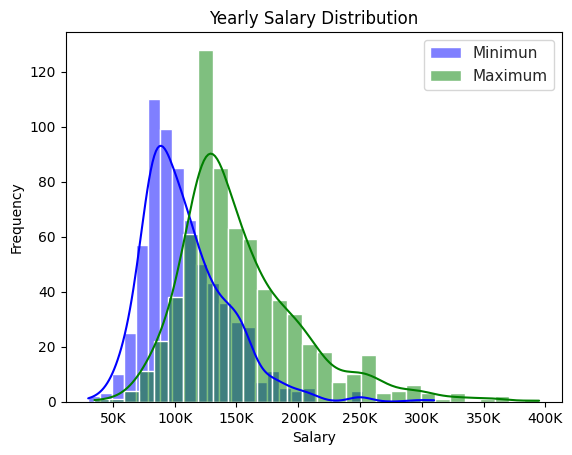

In [18]:
# Remove NaN values from the 'Min Salary' and 'Max Salary' columns
min_salary_data = df_cleaned['Min Salary'].dropna() / 1000
max_salary_data = df_cleaned['Max Salary'].dropna() / 1000

# Create a figure and axis
fig, ax = plt.subplots()

# Set the style to use Seaborn style
sns.set(style="whitegrid")

# Create a histogram for 'Min Salary'
sns.histplot(min_salary_data, kde=True, color='blue', label='Minimun')

# Create a histogram for 'Max Salary'
sns.histplot(max_salary_data, kde=True, color='green', label='Maximum')

# Define a custom tick formatter to add 'K' to tick labels
def thousands(x, pos):
    'The two args are the value and tick position'
    return f'{x:.0f}K'

# Set the x-axis formatter
formatter = FuncFormatter(thousands)
ax.xaxis.set_major_formatter(formatter)

# Set labels and title
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
ax.set_title('Yearly Salary Distribution')

# Show the legend
plt.legend()

# Show the plot
plt.show()

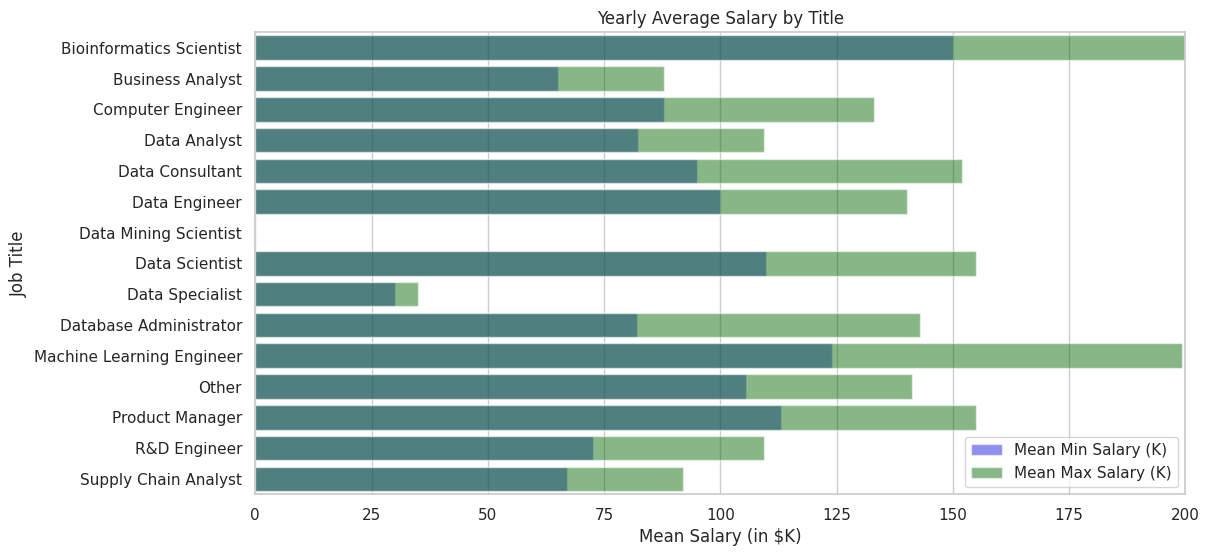

In [19]:
# Group the data by 'Title' and calculate descriptive statistics for salaries
title_salary_stats = df_cleaned.groupby('Title')[['Min Salary', 'Max Salary']].describe()

# Create a bar chart to display the average salaries by job title
plt.figure(figsize=(12, 6))
sns.barplot(x=title_salary_stats['Min Salary']['mean'] / 1000, y=title_salary_stats.index, color='blue', alpha=0.5, label='Mean Min Salary (K)')
sns.barplot(x=title_salary_stats['Max Salary']['mean'] / 1000, y=title_salary_stats.index, color='green', alpha=0.5, label='Mean Max Salary (K)')

plt.xlabel('Mean Salary (in $K)')
plt.ylabel('Job Title')
plt.title('Yearly Average Salary by Title')
plt.legend()

# Adjust the axis scales if necessary
plt.xlim(0, 200)  # Set the x-axis scale according to your data

plt.show()

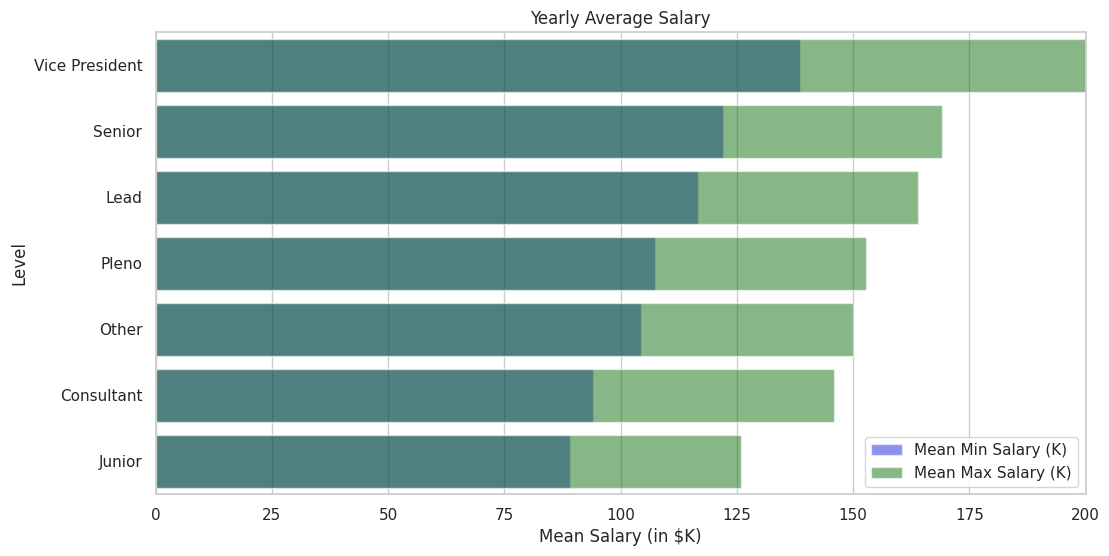

In [20]:
# Group the data by 'Level' and calculate descriptive statistics for salaries
level_salary_stats = df_cleaned.groupby('Level')[['Min Salary', 'Max Salary']].describe()

# Sort the DataFrame by "Mean Min Salary" in descending order
level_salary_stats = level_salary_stats.sort_values(by=('Min Salary', 'mean'), ascending=False)

# Create a bar plot to show the average salaries by level
plt.figure(figsize=(12, 6))
sns.barplot(x=level_salary_stats['Min Salary']['mean'] / 1000, y=level_salary_stats.index, color='blue', alpha=0.5, label='Mean Min Salary (K)')
sns.barplot(x=level_salary_stats['Max Salary']['mean'] / 1000, y=level_salary_stats.index, color='green', alpha=0.5, label='Mean Max Salary (K)')

plt.xlabel('Mean Salary (in $K)')
plt.ylabel('Level')
plt.title('Yearly Average Salary')
plt.legend()

# Adjust axis scales if necessary
plt.xlim(0, 200)  # Set the x-axis scale according to your data

plt.show()

### 3. Company Rating Analysis (Rating):

    - Calculate descriptive statistics for company ratings.
    - Visualize the distribution of ratings using a histogram.

In [21]:
# Calculate descriptive statistics for company ratings
rating_stats = df_cleaned['Rating'].describe()
rating_stats

count    820.000000
mean       3.455000
std        1.495753
min       -1.000000
25%        3.500000
50%        3.900000
75%        4.200000
max        5.000000
Name: Rating, dtype: float64

In my opinion, -1 signifies that a value has not been provided or left unfilled.

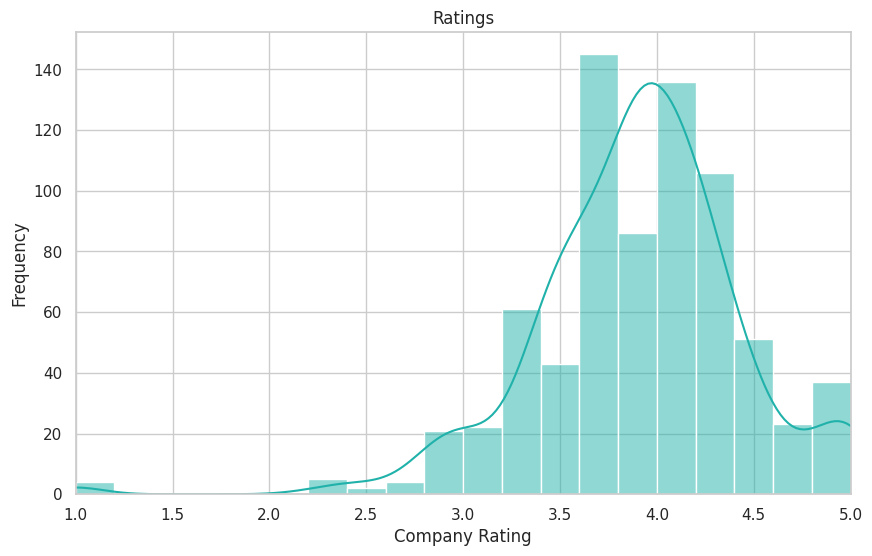

In [22]:
# Filter out entries with -1 ratings
filtered_df = df_cleaned[df_cleaned['Rating'] != -1]

# Calculate descriptive statistics for company ratings
rating_stats = filtered_df['Rating'].describe()

# Create a histogram for company ratings
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Rating'], bins=20, color='lightseagreen', kde=True)
plt.xlabel('Company Rating')
plt.ylabel('Frequency')
plt.title('Ratings')
plt.xlim(1, 5)  # Set the x-axis range to typical ratings
plt.show()

### 4. Location Analysis (Location):

    - Identify cities or regions with the most job opportunities.
    - Visualize the geographical distribution of job opportunities on bar chart.

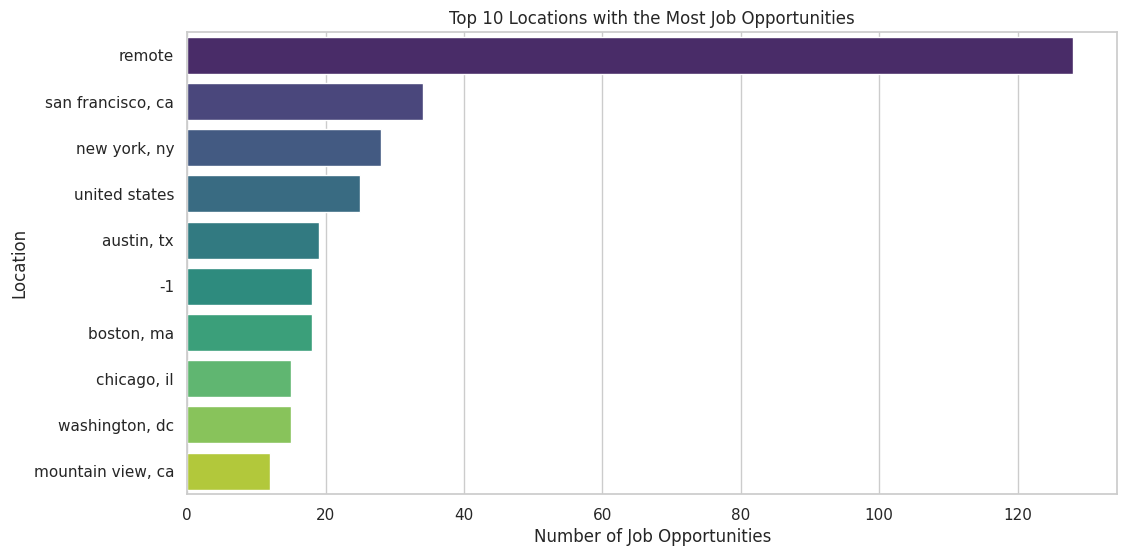

In [23]:
# Group the data by 'Location' and count the number of job opportunities
location_counts = df_cleaned['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Job Opportunities']

# Sort the locations based on job opportunities in descending order
location_counts = location_counts.sort_values(by='Job Opportunities', ascending=False)

# Visualize the top locations with the most job opportunities using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Job Opportunities', y='Location', data=location_counts.head(10), palette='viridis')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Location')
plt.title('Top 10 Locations with the Most Job Opportunities')
plt.show()


### 5. Company Size Analysis (Size):

    - Assess the distribution of companies by size.
    - Verify if company size affects salaries.

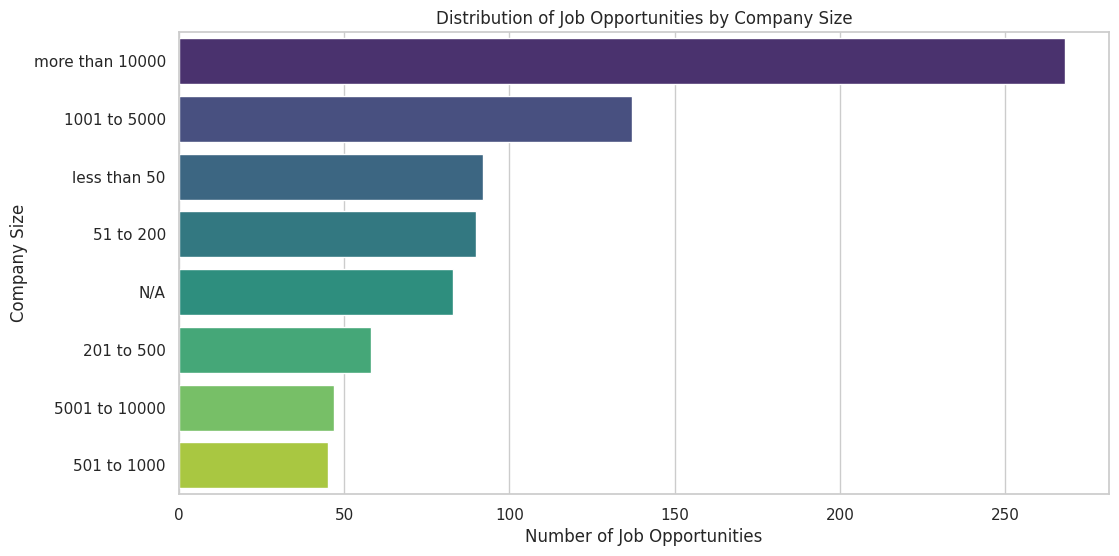

In [24]:
# Replace 'unknown' and '-1' with 'N/A' in the 'Size' column
df_cleaned['Size'] = df_cleaned['Size'].replace(['unknown', '-1'], 'N/A')

# Define a dictionary to map company sizes to categories
size_mapping = {
    '1 to 50 employees': 'less than 50',
    '51 to 200 employees': '51 to 200',
    '201 to 500 employees': '201 to 500',
    '501 to 1000 employees': '501 to 1000',
    '1001 to 5000 employees': '1001 to 5000',
    '5001 to 10000 employees': '5001 to 10000',
    '10000+ employees': 'more than 10000',
    'N/A': 'N/A'
}

# Apply the mapping to the 'Size' column
df_cleaned['Size'] = df_cleaned['Size'].map(size_mapping)

# Group the data by 'Size' and count the number of job opportunities
size_counts = df_cleaned['Size'].value_counts().reset_index()
size_counts.columns = ['Company Size', 'Job Opportunities']

# Sort the company sizes based on job opportunities in descending order
size_counts = size_counts.sort_values(by='Job Opportunities', ascending=False)

# Visualize the distribution of job opportunities by company size using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Job Opportunities', y='Company Size', data=size_counts, palette='viridis')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Company Size')
plt.title('Distribution of Job Opportunities by Company Size')
plt.show()

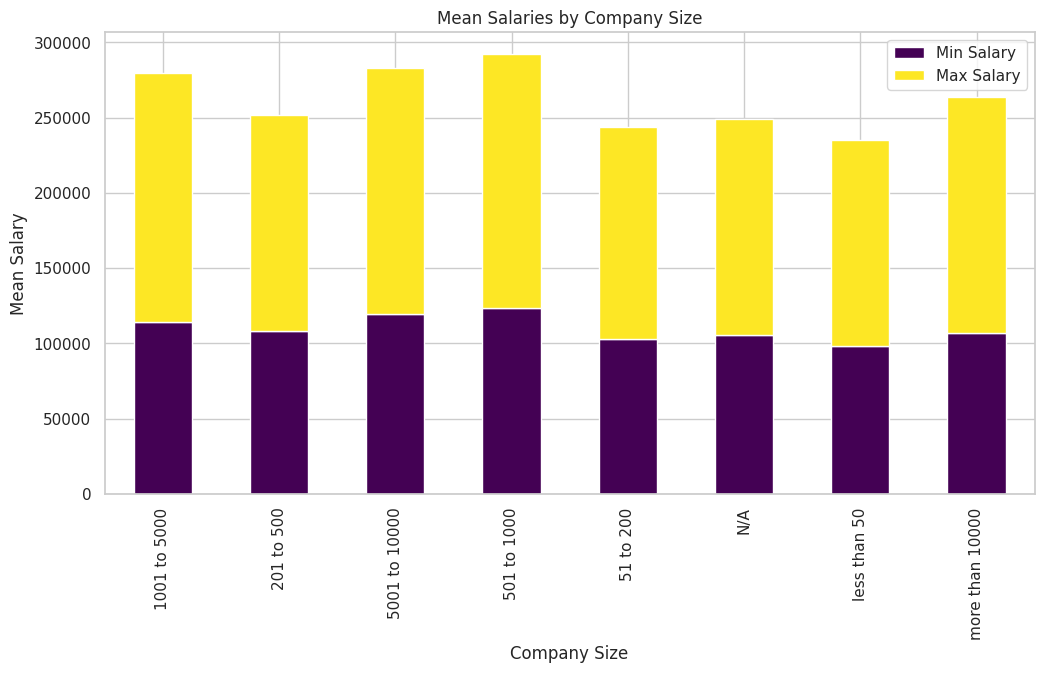

In [25]:
# Group the data by 'Size' and calculate the mean salaries
size_salary_means = df_cleaned.groupby('Size')[['Min Salary', 'Max Salary']].mean()

# Create a stacked bar chart to show the mean salaries for each company size
size_salary_means.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Company Size')
plt.ylabel('Mean Salary')
plt.title('Mean Salaries by Company Size')
plt.show()

# 6. Company Founded Year Analysis (Founded):

    - Analyze if older companies have any influence on compensation or ratings.
    - Visualize the distribution of companies by founding year.

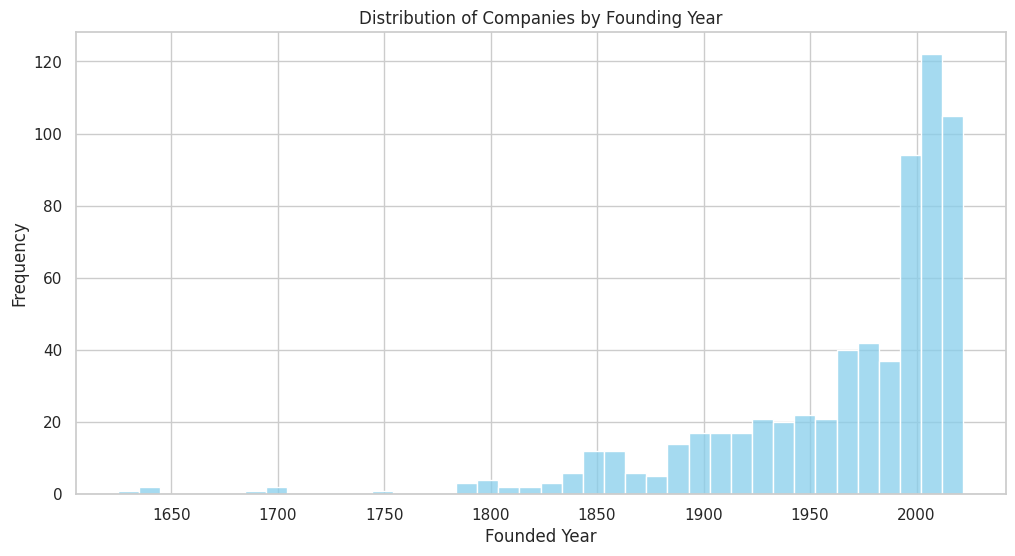

In [26]:
# Filter out entries with unknown or missing founded years
filtered_df = df_cleaned[df_cleaned['Founded'] > 0]

# Analyze Influence on Compensation (Min and Max Salary)
compensation_by_founded_year = filtered_df.groupby('Founded')[['Min Salary', 'Max Salary']].mean()

# Analyze Influence on Ratings
ratings_by_founded_year = filtered_df.groupby('Founded')['Rating'].mean()

# Visualize the Distribution of Companies by Founding Year
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['Founded'], bins=40, color='skyblue')
plt.xlabel('Founded Year')
plt.ylabel('Frequency')
plt.title('Distribution of Companies by Founding Year')

plt.show()

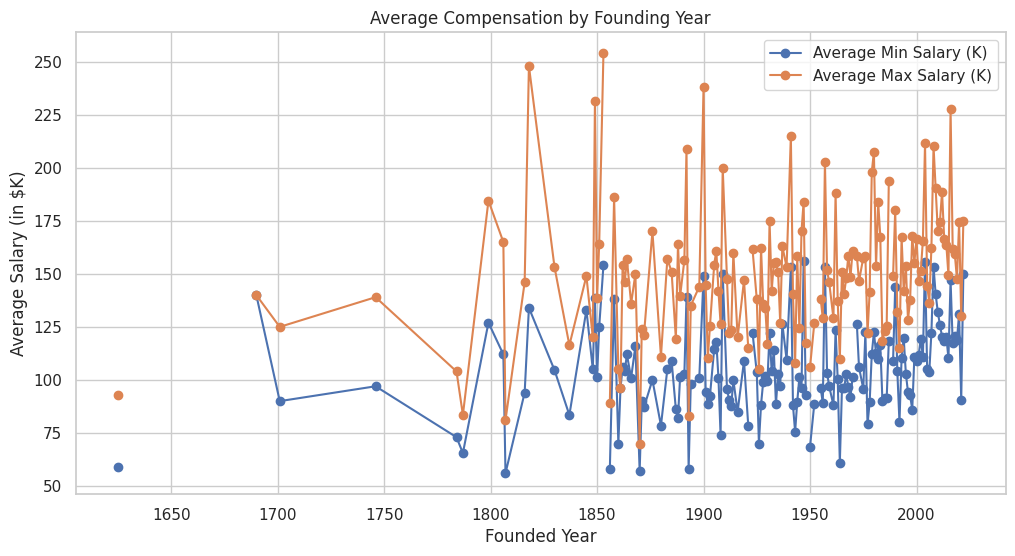

In [27]:
# Filter out entries with unknown or missing founded years
filtered_df = df_cleaned[df_cleaned['Founded'] > 0]

# Calculate the average Min Salary and Max Salary for companies founded in different years
compensation_by_founded_year = filtered_df.groupby('Founded')[['Min Salary', 'Max Salary']].mean()

# Visualize the Average Compensation by Founding Year
plt.figure(figsize=(12, 6))
plt.plot(compensation_by_founded_year.index, compensation_by_founded_year['Min Salary'] / 1000, marker='o', label='Average Min Salary (K)')
plt.plot(compensation_by_founded_year.index, compensation_by_founded_year['Max Salary'] / 1000, marker='o', label='Average Max Salary (K)')
plt.xlabel('Founded Year')
plt.ylabel('Average Salary (in $K)')
plt.title('Average Compensation by Founding Year')
plt.legend()
plt.grid(True)
plt.show()

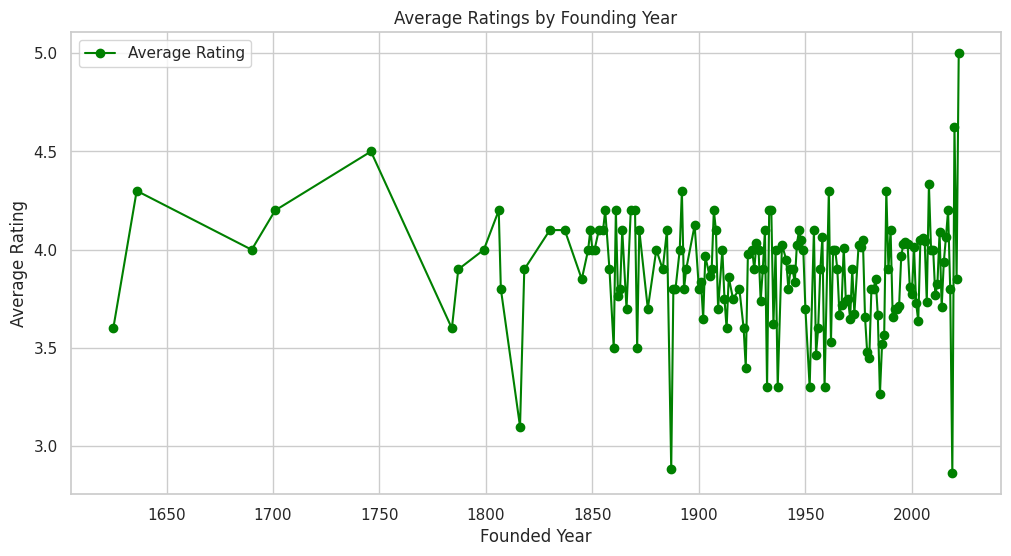

In [28]:
# Filter out entries with unknown or missing founded years
filtered_df = df_cleaned[df_cleaned['Founded'] > 0]

# Calculate the average company ratings for companies founded in different years
ratings_by_founded_year = filtered_df.groupby('Founded')['Rating'].mean()

# Visualize the Average Ratings by Founding Year
plt.figure(figsize=(12, 6))
plt.plot(ratings_by_founded_year.index, ratings_by_founded_year, marker='o', color='green', label='Average Rating')
plt.xlabel('Founded Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Founding Year')
plt.legend()
plt.grid(True)
plt.show()

### 7. Type of Ownership Analysis (Type of Ownership):

    - Identify the distribution of company ownership types.

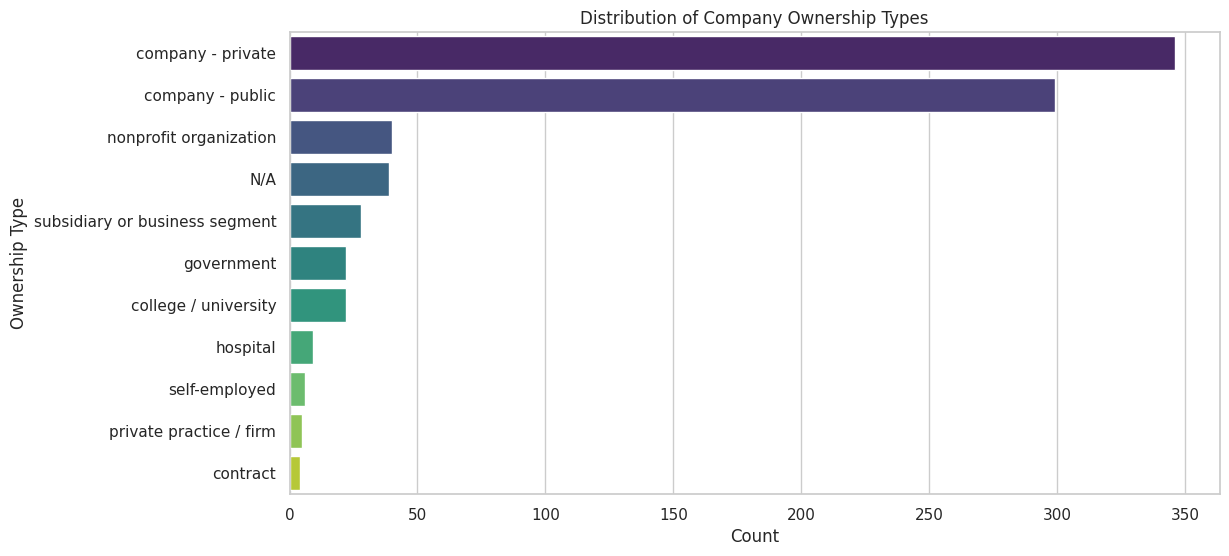

In [29]:
# Replace 'unknown' and '-1' with 'N/A' in the 'Type of ownership' column
df_cleaned['Type of ownership'] = df_cleaned['Type of ownership'].replace(['unknown', '-1'], 'N/A')

# Analyze the distribution of company ownership types
ownership_counts = df_cleaned['Type of ownership'].value_counts().reset_index()
ownership_counts.columns = ['Ownership Type', 'Count']

# Sort the ownership types based on count in descending order
ownership_counts = ownership_counts.sort_values(by='Count', ascending=False)

# Visualize the distribution of ownership types using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Ownership Type', data=ownership_counts, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Ownership Type')
plt.title('Distribution of Company Ownership Types')
plt.show()

### 8. Industry and Sector Analysis (Industry and Sector):

    - Identify industries and sectors with the most job opportunities.
    - Visualize the distribution of job opportunities by industry and sector.

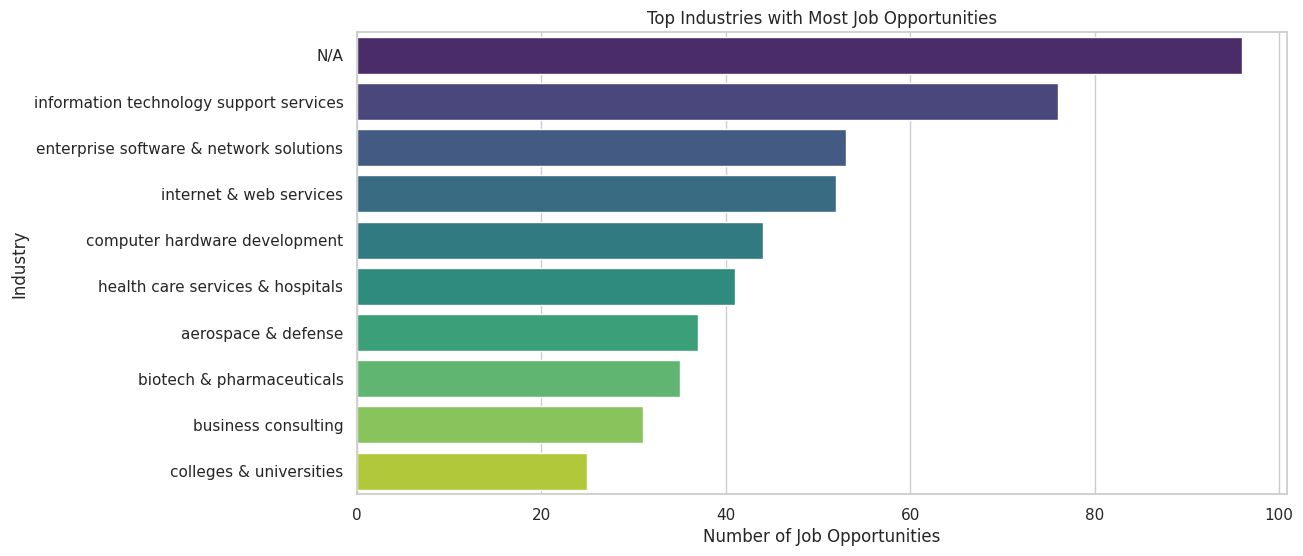

In [30]:
# Replace 'unknown' and '-1' with 'N/A' in the 'Type of ownership' column
df_cleaned['Industry'] = df_cleaned['Industry'].replace(['unknown', '-1'], 'N/A')
df_cleaned['Sector'] = df_cleaned['Sector'].replace(['unknown', '-1'], 'N/A')

# Count the number of job opportunities by industry
industry_counts = df_cleaned['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Job Opportunities']

# Count the number of job opportunities by sector
sector_counts = df_cleaned['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Job Opportunities']


plt.figure(figsize=(12, 6))
sns.barplot(x='Job Opportunities', y='Industry', data=industry_counts.head(10), palette='viridis')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Industry')
plt.title('Top Industries with Most Job Opportunities')
plt.show()

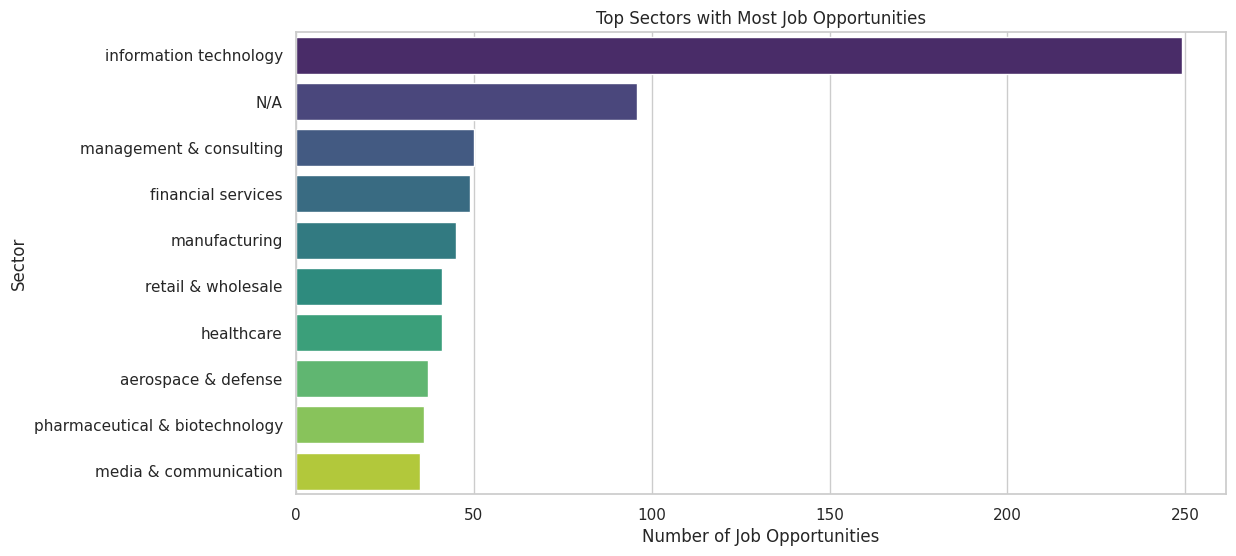

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Job Opportunities', y='Sector', data=sector_counts.head(10), palette='viridis')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Sector')
plt.title('Top Sectors with Most Job Opportunities')
plt.show()

### 9. Revenue Analysis (Revenue):

     - Analyze the distribution of companies based on revenue range.
     - Check if company revenue affects salaries or other variables.

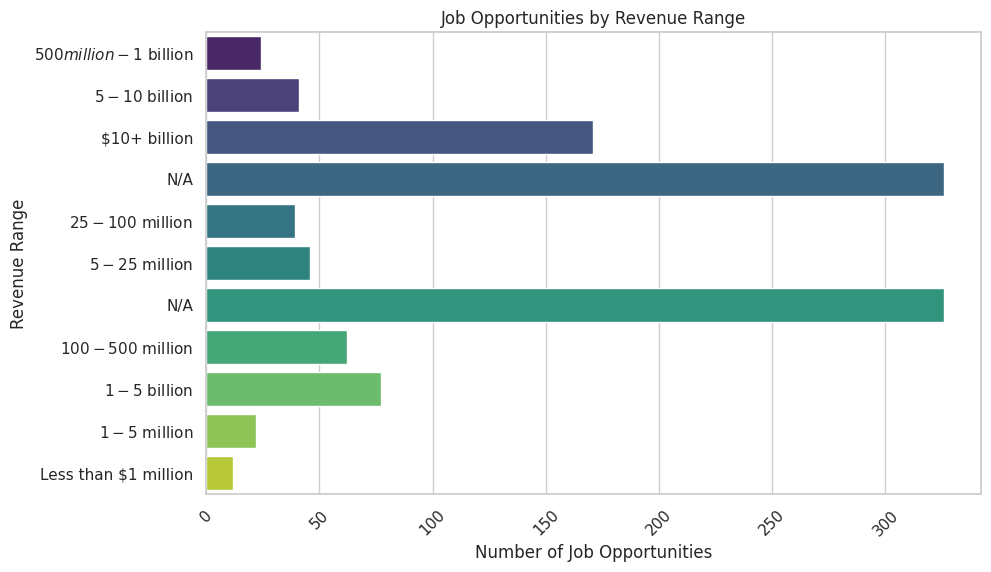

In [32]:
# Define revenue ranges
revenue_ranges = {
    '$500 million to $1 billion (usd)': '$500 million - $1 billion',
    '$5 to $10 billion (usd)': '$5 - $10 billion',
    '$10+ billion (usd)': '$10+ billion',
    'unknown / non-applicable': 'N/A',
    '$25 to $100 million (usd)': '$25 - $100 million',
    '$5 to $25 million (usd)': '$5 - $25 million',
    '-1': 'N/A',
    '$100 to $500 million (usd)': '$100 - $500 million',
    '$1 to $5 billion (usd)': '$1 - $5 billion',
    '$1 to $5 million (usd)': '$1 - $5 million',
    'less than $1 million (usd)': 'Less than $1 million'
}

# Apply the mapping to the 'Revenue' column
df_cleaned['Revenue'] = df_cleaned['Revenue'].map(revenue_ranges)

# Specify the order for revenue ranges
revenue_order = list(revenue_ranges.values())

# Group the data by 'Revenue' and count the number of job opportunities
revenue_counts = df_cleaned['Revenue'].value_counts().reset_index()
revenue_counts.columns = ['Revenue Range', 'Job Opportunities']

# Sort the revenue ranges based on job opportunities in descending order
revenue_counts = revenue_counts.sort_values(by='Job Opportunities', ascending=False)

# Visualize the distribution of job opportunities by revenue range using a bar chart with inverted axes
plt.figure(figsize=(10, 6))
sns.barplot(x='Job Opportunities', y='Revenue Range', data=revenue_counts, order=revenue_order, palette='viridis')
plt.xlabel('Number of Job Opportunities')
plt.ylabel('Revenue Range')
plt.title('Job Opportunities by Revenue Range')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

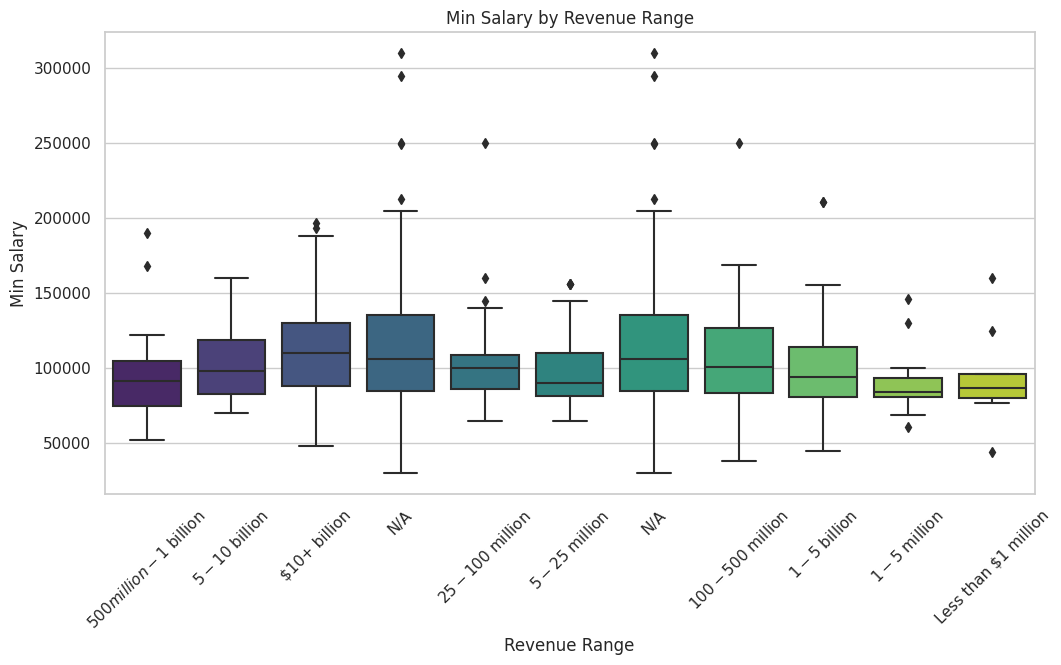

In [33]:
# Create box plots to visualize the distribution of Min Salary by Revenue Range
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Revenue', y='Min Salary', order=revenue_order, palette='viridis')
plt.xlabel('Revenue Range')
plt.ylabel('Min Salary')
plt.title('Min Salary by Revenue Range')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

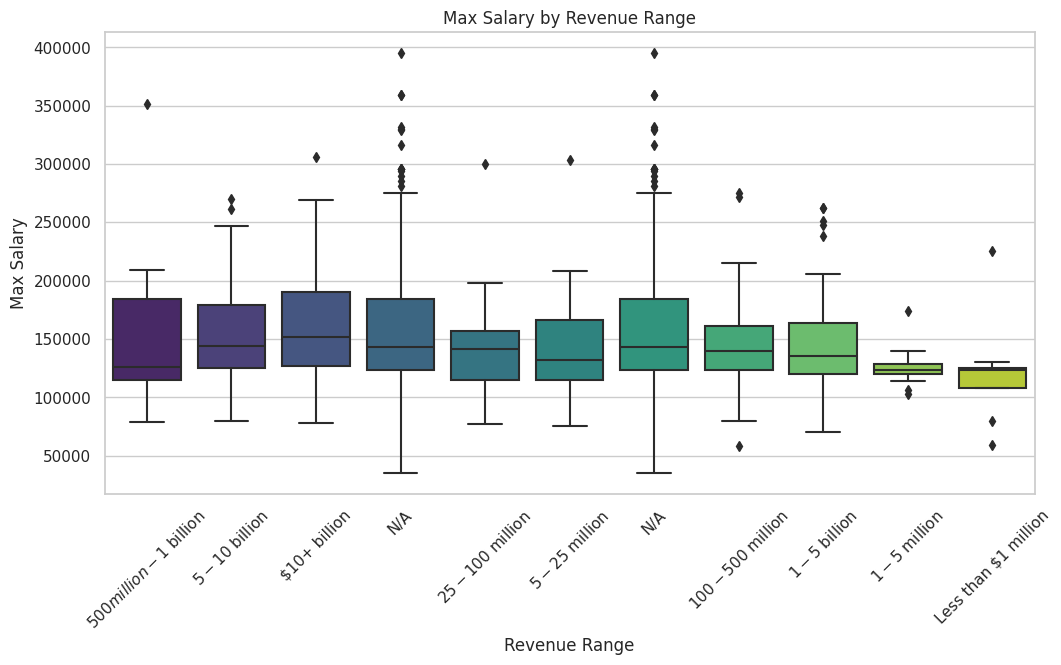

In [34]:
# Create box plots to visualize the distribution of Max Salary by Revenue Range
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Revenue', y='Max Salary', order=revenue_order, palette='viridis')
plt.xlabel('Revenue Range')
plt.ylabel('Max Salary')
plt.title('Max Salary by Revenue Range')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

### 10. Job Description Keyword Analysis (Job Description):

    - Perform a text analysis to identify the most common keywords in job descriptions.

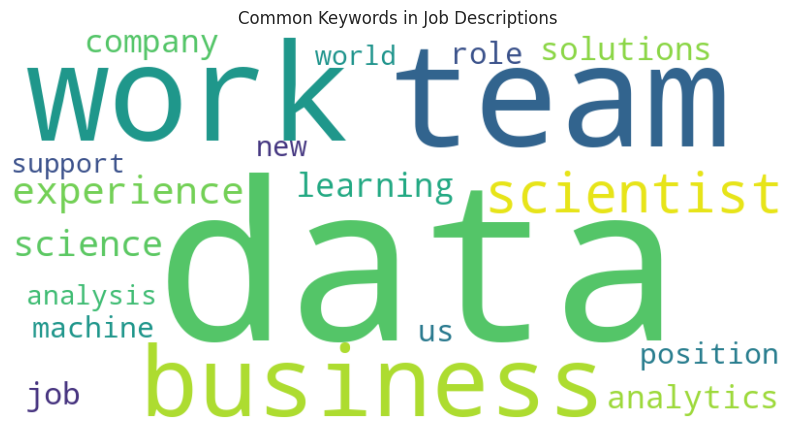

In [35]:
# Sample job descriptions
job_descriptions = df_cleaned['Job Description'].dropna()

# Combine all job descriptions into a single text
text = " ".join(job_descriptions)

# Tokenization and stopwords removal
words = nltk.word_tokenize(text)
words = [word.lower() for word in words if word.isalnum()]
words = [word for word in words if word not in stopwords.words('english')]

# Frequency distribution
fdist = nltk.FreqDist(words)

# Get the most common keywords
common_keywords = fdist.most_common(20)

# Create a word cloud to visualize common keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_keywords))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Common Keywords in Job Descriptions')
plt.show()